<a href="https://colab.research.google.com/github/hwpark0826/HK-M-Project/blob/main/lgbm_%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [28]:
df_all=pd.read_csv('df_all')

In [29]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 0 to 1781
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PHI_BENEFIT    4517 non-null   float64
 1   PHI_PREMIUM    4517 non-null   float64
 2   H_INC_TOT      4517 non-null   float64
 3   DEBT_RATIO     4517 non-null   float64
 4   PROP           4517 non-null   float64
 5   CUSTM_BENF_YN  4517 non-null   float64
 6   P2             4517 non-null   float64
 7   P2_2           4517 non-null   float64
 8   SEX            4517 non-null   float64
 9   DISA_YN        4517 non-null   float64
 10  AGE            4517 non-null   float64
 11  WT_MG          4517 non-null   int64  
 12  INMED_CNR      4517 non-null   float64
 13  INMED_CVD      4517 non-null   float64
 14  INMED_ETC      4517 non-null   float64
 15  INMED_HPT      4517 non-null   float64
 16  INMED_HTN      4517 non-null   float64
 17  INMED_LIV      4517 non-null   float64
 18  INMED_LRI    

## XGB

In [30]:
data = df_all.copy()

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# XGBRegressor 모델 정의 (하이퍼파라미터 설정)
XGB = XGBRegressor(
    max_depth=3,             # 트리의 최대 깊이
    n_estimators=1000,       # 최대 1000개의 트리
    objective="reg:squarederror",  # 회귀 문제
    eval_metric="mae", # 평가 지표 (MAE)
    early_stopping_rounds=5
)

# 학습 (early stopping 설정)
XGB.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # 검증 세트 제공
    verbose=True
)

# 예측
y_pred_train = XGB.predict(X_train)
y_pred_test = XGB.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")

print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

[0]	validation_0-mae:1.96591
[1]	validation_0-mae:1.55624
[2]	validation_0-mae:1.28557
[3]	validation_0-mae:1.13073
[4]	validation_0-mae:1.05100
[5]	validation_0-mae:1.00532
[6]	validation_0-mae:0.98500
[7]	validation_0-mae:0.97322
[8]	validation_0-mae:0.97265
[9]	validation_0-mae:0.96643
[10]	validation_0-mae:0.96168
[11]	validation_0-mae:0.96027
[12]	validation_0-mae:0.96257
[13]	validation_0-mae:0.95954
[14]	validation_0-mae:0.95320
[15]	validation_0-mae:0.95672
[16]	validation_0-mae:0.95780
[17]	validation_0-mae:0.95857
[18]	validation_0-mae:0.95850
--- Training Set Performance ---
MSE: 1.8119
RMSE: 1.3461
MAE: 0.9446
R² Score: 0.9419

--- Test Set Performance ---
MSE: 2.3075
RMSE: 1.5191
MAE: 0.9532
R² Score: 0.9181


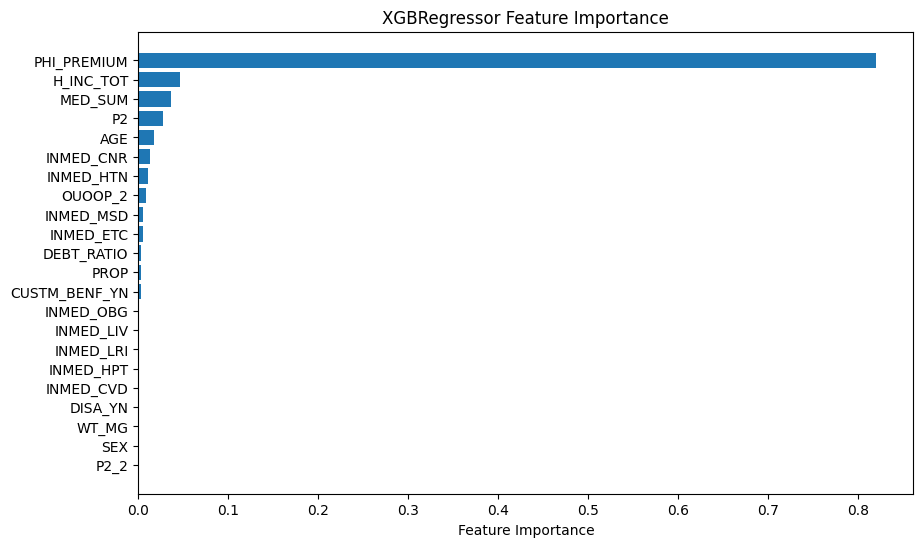

In [38]:
import matplotlib.pyplot as plt

# 피쳐 중요도 출력
importance = XGB.feature_importances_
feature_names = X_train.columns

# 피쳐 중요도와 피쳐 이름을 데이터프레임으로 묶어서 정렬
import pandas as pd

# 피쳐 중요도를 데이터프레임으로 묶고, 중요도 기준으로 내림차순 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance')

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBRegressor Feature Importance')
plt.show()

## 랜덤 포레스트

In [34]:
data = df_all.copy()

In [35]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(
    max_depth=3,             # 트리의 최대 깊이
    n_estimators=1000)       # 최대 1000개의 트리
rf_model.fit(X_train, y_train)

# 학습 데이터에 대한 예측
y_pred_train = rf_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_pred_test = rf_model.predict(X_test)

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")

print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 2.1580
RMSE: 1.4690
MAE: 1.0193
R² Score: 0.9308

--- Test Set Performance ---
MSE: 2.7651
RMSE: 1.6629
MAE: 0.9961
R² Score: 0.9018


### 피처 중요도

In [19]:
# 모델에 사용된 feature importance 추출
importances = rf_model.feature_importances_

# 특성 이름(컬럼명)은 X 데이터프레임의 컬럼명을 사용
feature_names = X_train.columns

# DataFrame으로 만들어 중요도 순으로 정렬 (상위 20개만 확인하려면 .head(20) 사용)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

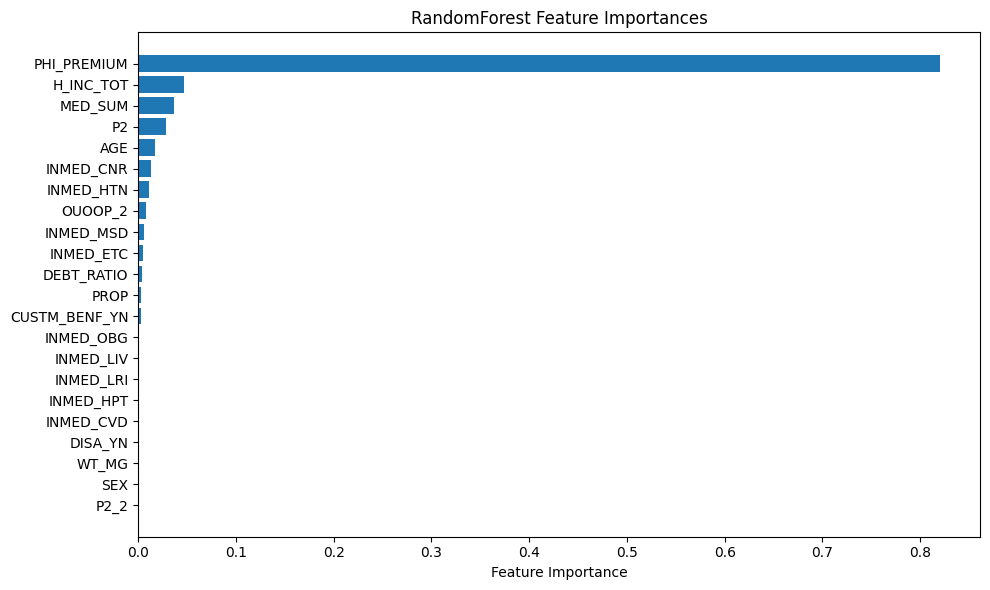

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('RandomForest Feature Importances')
plt.tight_layout()
plt.show()

## 선형회귀모델

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=1),
}

# 모델 학습 및 평가
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습

    # Train 예측 및 평가
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Test 예측 및 평가
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        "Train": {"MSE": mse_train, "RMSE": rmse_train, "MAE": mae_train, "R²": r2_train},
        "Test": {"MSE": mse_test, "RMSE": rmse_test, "MAE": mae_test, "R²": r2_test}
    }

# 결과 출력 (Train/Test 성능 비교)
for model, metrics in results.items():
    print(f"\n--- {model} ---")
    print("[Train Performance]")
    for metric, value in metrics["Train"].items():
        print(f"{metric}: {value:.4f}")

    print("[Test Performance]")
    for metric, value in metrics["Test"].items():
        print(f"{metric}: {value:.4f}")


--- Linear Regression ---
[Train Performance]
MSE: 2.5982
RMSE: 1.6119
MAE: 1.2004
R²: 0.9167
[Test Performance]
MSE: 2.8829
RMSE: 1.6979
MAE: 1.1820
R²: 0.8976

--- Lasso ---
[Train Performance]
MSE: 2.7933
RMSE: 1.6713
MAE: 1.2356
R²: 0.9104
[Test Performance]
MSE: 3.1525
RMSE: 1.7755
MAE: 1.1829
R²: 0.8881


In [21]:
# OLS (statsmodels)로 회귀 계수 및 유의성 확인
X_train_const = sm.add_constant(X_train)  # 상수항 추가
ols_model = sm.OLS(y_train, X_train_const)
ols_result = ols_model.fit()

print("\n--- OLS 회귀 분석 결과 ---")
print(ols_result.summary())  # 회귀 계수 + p-value 확인


--- OLS 회귀 분석 결과 ---
                            OLS Regression Results                            
Dep. Variable:            PHI_BENEFIT   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:45:20   Log-Likelihood:                -6851.5
No. Observations:                3613   AIC:                         1.375e+04
Df Residuals:                    3590   BIC:                         1.389e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2240

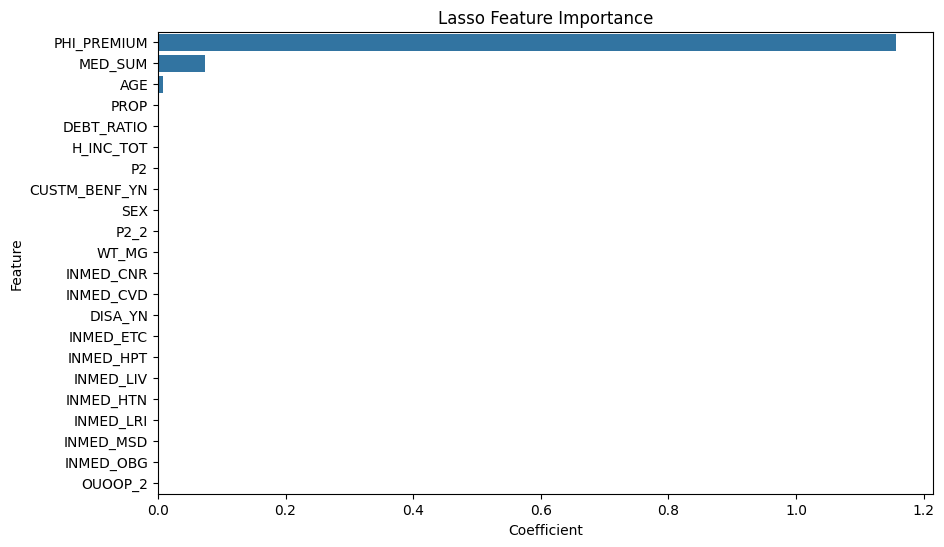

In [41]:
# Lasso 모델 생성
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Lasso 회귀 계수 데이터프레임 생성
lasso_coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": lasso.coef_})
lasso_coef_df = lasso_coef_df.sort_values(by="Coefficient", ascending=False)

# Lasso 회귀 계수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=lasso_coef_df)
plt.title("Lasso Feature Importance")
plt.show()